Step 1.  Data Collection and Preparation

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [18]:
# Data Loading
fulfilment_center_info = pd.read_csv(r'E:\Users\BHAVIKA\Desktop\food demand forecasting\fulfilment_center_info.csv')
meal_info = pd.read_csv(r'E:\Users\BHAVIKA\Desktop\food demand forecasting\meal_info.csv')
train = pd.read_csv(r'E:\Users\BHAVIKA\Desktop\food demand forecasting\train.csv')
test = pd.read_csv(r'E:\Users\BHAVIKA\Desktop\food demand forecasting\test.csv')


In [19]:
# Perform EDA
print(train.head())

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40  


In [20]:
print(train.describe())

                 id           week      center_id        meal_id  \
count  4.565480e+05  456548.000000  456548.000000  456548.000000   
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion  \
count   456548.000000  456548.000000          456548.000000   
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243.500000               0.000000   
50%      

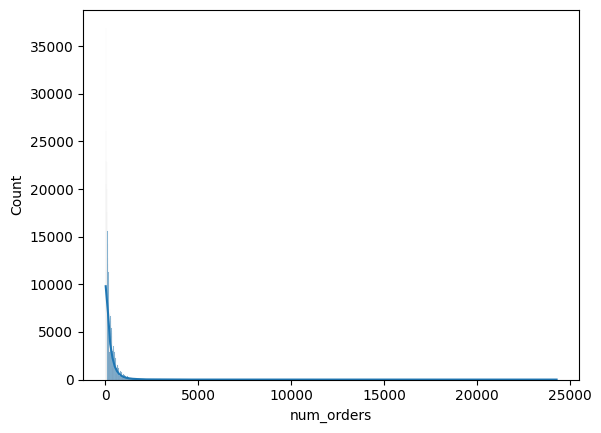

In [21]:
# Visualize distribution of number of orders
sns.histplot(train['num_orders'], kde=True)
plt.show()

In [22]:
# Merge datasets
train = train.merge(fulfilment_center_info, on='center_id', how='left')
train = train.merge(meal_info, on='meal_id', how='left')
test = test.merge(fulfilment_center_info, on='center_id', how='left')
test = test.merge(meal_info, on='meal_id', how='left')


Step 2: Feature Engineering and Model Training

In [23]:
# Drop unnecessary columns
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)


In [24]:
# Encode categorical features
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

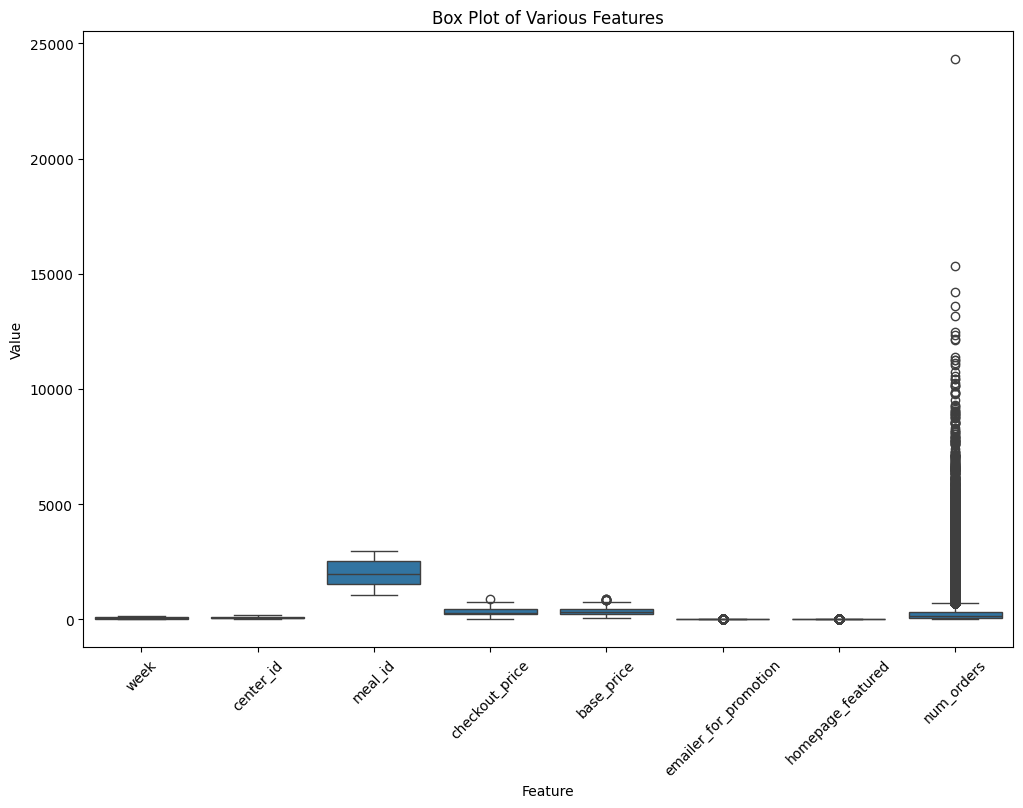

In [32]:
# Create Box Plots for All Features
features = ['week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 
            'emailer_for_promotion', 'homepage_featured', 'num_orders']

# Reshape data to long format
long_df = pd.melt(train[features], var_name='Feature', value_name='Value')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(data=long_df, x='Feature', y='Value')

# Set the title and labels
plt.title('Box Plot of Various Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

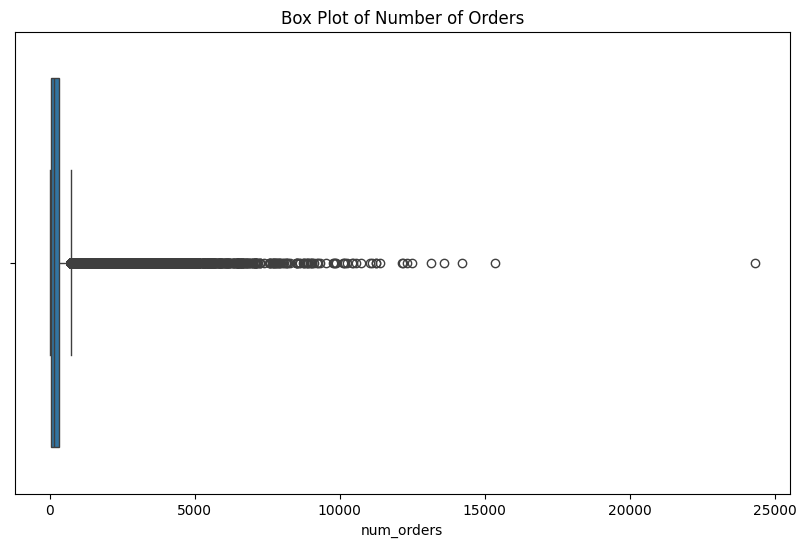

In [33]:
#Create the Box Plot for num_orders
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x=train['num_orders'])

# Set the title
plt.title('Box Plot of Number of Orders')

# Show the plot
plt.show()

In [39]:
print(train.columns)

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'op_area', 'center_type_TYPE_B', 'center_type_TYPE_C',
       'category_Biryani', 'category_Desert', 'category_Extras',
       'category_Fish', 'category_Other Snacks', 'category_Pasta',
       'category_Pizza', 'category_Rice Bowl', 'category_Salad',
       'category_Sandwich', 'category_Seafood', 'category_Soup',
       'category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai'],
      dtype='object')


C:\Users\BHAVIKA\AppData\Local\Temp\ipykernel_18444\178213052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_centers, x='center_id', y='num_orders', palette='viridis')


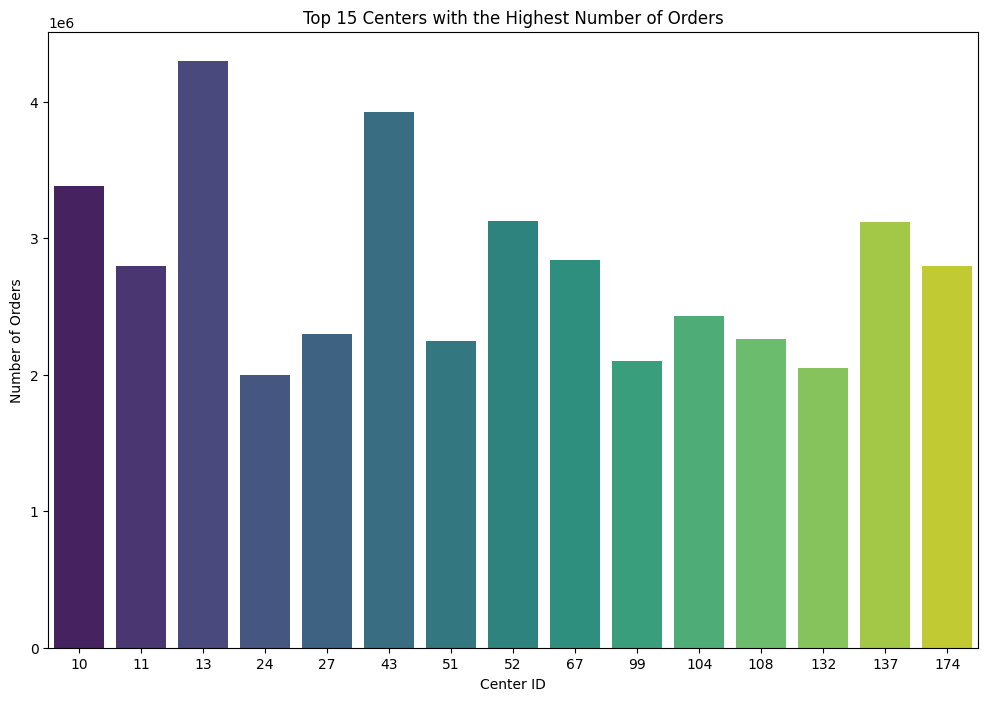

In [43]:
# Top 15 centers with the highest number of orders
center_orders = train.groupby('center_id')['num_orders'].sum().reset_index()
# Sort by number of orders and get the top 15 centers
top_centers = center_orders.sort_values(by='num_orders', ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_centers, x='center_id', y='num_orders', palette='viridis')
plt.title('Top 15 Centers with the Highest Number of Orders')
plt.xlabel('Center ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

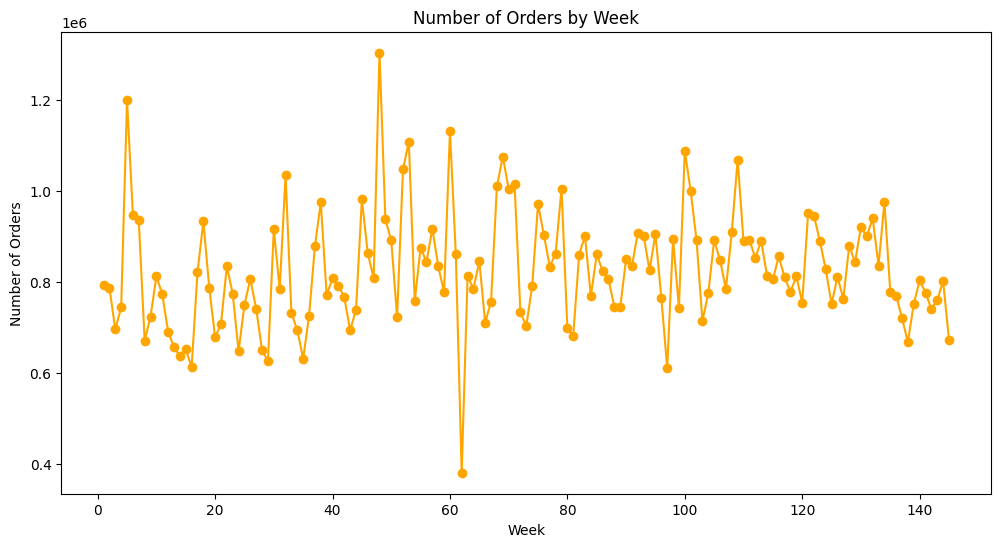

In [63]:
# Aggregate the number of orders by week)
orders_by_week = train.groupby('week')['num_orders'].sum().reset_index()

# Plotting the line plot
plt.figure(figsize=(12, 6))

# Create the line plot
plt.plot(orders_by_week['week'], orders_by_week['num_orders'], marker='o', linestyle='-', color = 'orange')

# Set labels and title
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Week')
plt.show()

In [45]:
# Compute the Correlation Matrix
correlation_matrix = train.corr()

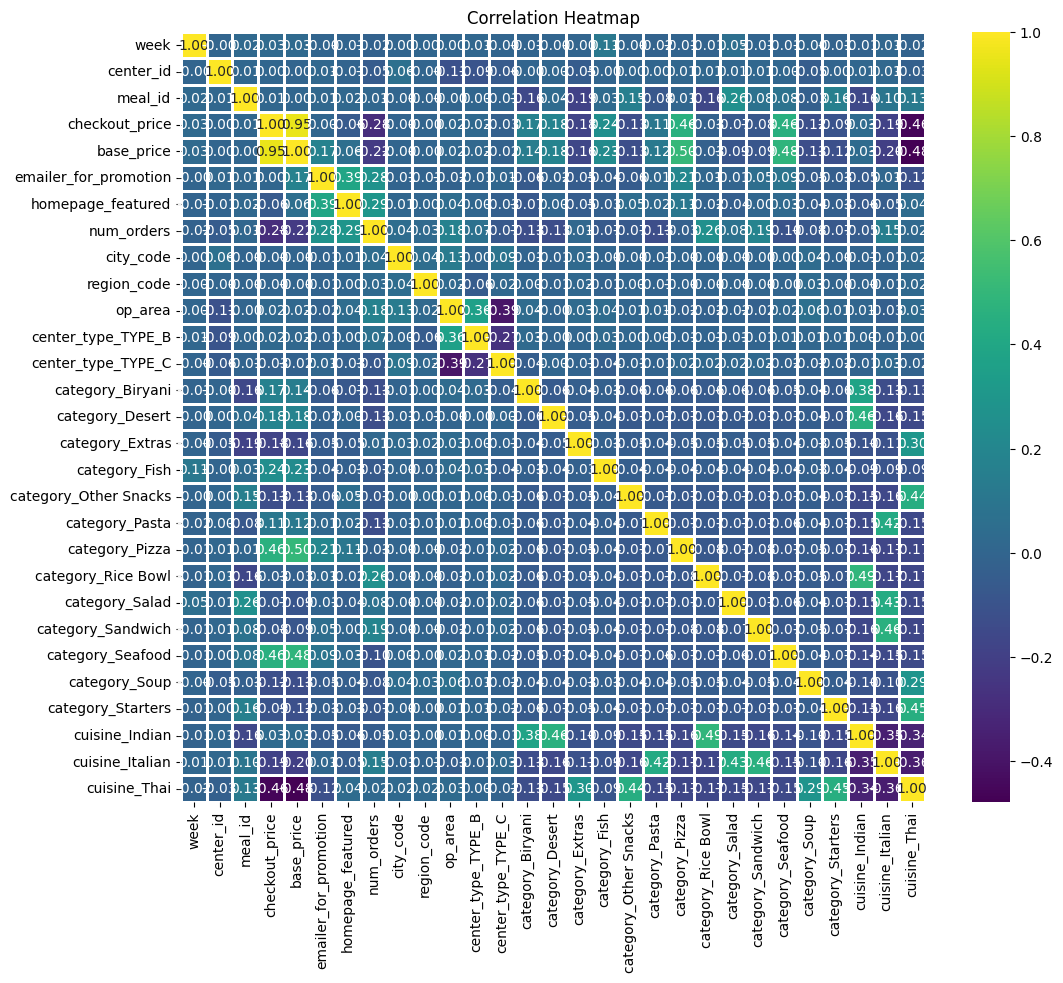

In [58]:
#Creating the Heatmap

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [53]:
# Train-test split
X = train.drop('num_orders', axis=1)
y = train['num_orders']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [65]:
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 20466.573772780637


In [66]:
# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']

Step 3: Flask Application for Food Demand Forecasting

In [34]:
!pip install flask


   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/101.7 kB ? eta -:--:--
   ------------------------------------ --- 92.2/101.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 92.2/101.7 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- 101.7/101.7 kB 325.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/97.9 kB 2.0 MB/s eta 0:00:01
   ------------------------------------- -- 92.2/97.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 92.2/97.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 92.2/97.9 kB 1.3 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
import joblib

In [69]:
# Initialize Flask app
app = Flask(__name__)

In [70]:
# Load the trained model
model = joblib.load('model.pkl')


In [71]:
from flask import Flask, render_template_string
from threading import Thread

# Initialize Flask app
app = Flask(__name__)

# Define HTML template
template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Food Demand Forecasting</title>
</head>
<body>
    <h2>Food Demand Forecasting</h2>
    <form action="/predict" method="post">
        <label for="center_id">Center ID:</label>
        <input type="text" id="center_id" name="center_id"><br><br>

        <label for="meal_id">Meal ID:</label>
        <input type="text" id="meal_id" name="meal_id"><br><br>

        <label for="checkout_price">Checkout Price:</label>
        <input type="text" id="checkout_price" name="checkout_price"><br><br>

        <label for="base_price">Base Price:</label>
        <input type="text" id="base_price" name="base_price"><br><br>

        <label for="emailer_for_promotion">Emailer for Promotion:</label>
        <input type="text" id="emailer_for_promotion" name="emailer_for_promotion"><br><br>

        <label for="homepage_featured">Homepage Featured:</label>
        <input type="text" id="homepage_featured" name="homepage_featured"><br><br>

        <label for="city_code">City Code:</label>
        <input type="text" id="city_code" name="city_code"><br><br>

        <label for="region_code">Region Code:</label>
        <input type="text" id="region_code" name="region_code"><br><br>

        <label for="op_area">Operation Area:</label>
        <input type="text" id="op_area" name="op_area"><br><br>

        <input type="submit" value="Predict">
    </form>
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(template)

# Function to run the Flask app
def run_app():
    app.run(debug=True, use_reloader=False)

# Run the Flask app in a separate thread
thread = Thread(target=run_app)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jul/2024 23:09:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2024 23:09:03] "GET /favicon.ico HTTP/1.1" 404 -


Step 4: Interactive User Interface for Forecasting Demand

In [74]:
import ipywidgets as widgets
import ipywidgets as widgets
from IPython.display import display

In [75]:
# Step 3: Interactive User Interface
center_id = widgets.Text(description='Center ID:')
meal_id = widgets.Text(description='Meal ID:')
checkout_price = widgets.FloatText(description='Checkout Price:')
base_price = widgets.FloatText(description='Base Price:')
emailer_for_promotion = widgets.Text(description='Emailer for Promotion')
homepage_featured = widgets.Text(description='Homepage Featured')
city_code = widgets.Text(description='City Code:')
region_code = widgets.Text(description='Region Code:')
operation_area = widgets.Text(description='Operation Area:')
submit_button = widgets.Button(description='Forecast', button_style='success')
output = widgets.Output()

def on_submit_button_clicked(b):
    with output:
        output.clear_output()
        data = {
            'center_id': int(center_id.value),
            'meal_id': int(meal_id.value),
            'checkout_price': checkout_price.value,
            'base_price': base_price.value,
            'emailer_for_promotion': int(emailer_for_promotion.value),
            'homepage_featured': int(homepage_featured.value),
            'city_code': int(city_code.value),
            'region_code': int(region_code.value),
            'operation_area': int(operation_area.value)
        }
        response = requests.post('http://127.0.0.1:5000/forecast', json=data)
        result = response.json()
        display(HTML(f"<h3>Forecasted Demand: {result['forecast'][0]}</h3>"))

submit_button.on_click(on_submit_button_clicked)
display(center_id, meal_id, checkout_price, base_price, emailer_for_promotion, 
        homepage_featured, city_code, region_code, operation_area, submit_button, output)

Text(value='', description='Center ID:')

Text(value='', description='Meal ID:')

FloatText(value=0.0, description='Checkout Price:')

FloatText(value=0.0, description='Base Price:')

Text(value='', description='Emailer for Promotion')

Text(value='', description='Homepage Featured')

Text(value='', description='City Code:')

Text(value='', description='Region Code:')

Text(value='', description='Operation Area:')

Button(button_style='success', description='Forecast', style=ButtonStyle())

Output()